# Quality wine. A physicochemical Prediction with Logistic regression and Vector Support Machine


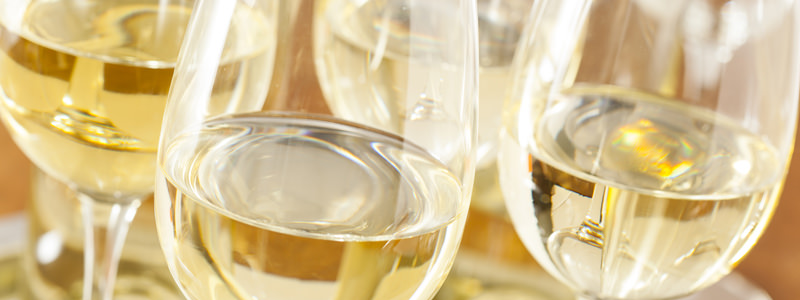

Attribute information:

   Input variables (based on physicochemical tests):
   
   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur dioxide
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol
   
   Output variable (based on sensory data): 
   
   12 - quality (Excelente/bueno)(1,0)
   
   Source:
   
   https://archive.ics.uci.edu/ml/datasets/wine+quality


In [1]:
### Libraries for charts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
# seaborn.set()

## Libraries for statitics 
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

# Initial treatment of Data

### import database

In [2]:
e_data= pd.read_csv("winequality-white.csv ", sep=';');e_data.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'], dtype=object)

In [3]:
e_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,EXCELENTE
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,EXCELENTE
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,EXCELENTE
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,EXCELENTE
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,EXCELENTE


##### Some basic calculations

In [4]:
e_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


# Preprocessing 

### Missing values

In [5]:
e_data.isnull().values.any()# Are there missing values?

False

### Outliers

In [6]:
e_data.info() # checking data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   object 
dtypes: float64(11), object(1)
memory usage: 459.3+ KB


In [7]:
e_data_1= e_data.iloc[:,:-1];e_data_1.columns.values #excluiding the "quality" variable(binary)

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

##### Median values

In [8]:
Q1 = e_data_1.quantile(0.25)
Q3 = e_data_1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity            1.000000
volatile acidity         0.110000
citric acid              0.120000
residual sugar           8.200000
chlorides                0.014000
free sulfur dioxide     23.000000
total sulfur dioxide    59.000000
density                  0.004377
pH                       0.190000
sulphates                0.140000
alcohol                  1.900000
dtype: float64


### Box plots

[Box plot's OpenLearn](https://www.open.edu/openlearn/science-maths-technology/mathematics-statistics/interpreting-data-boxplots-and-tables/content-section-0?active-tab=description-tab)



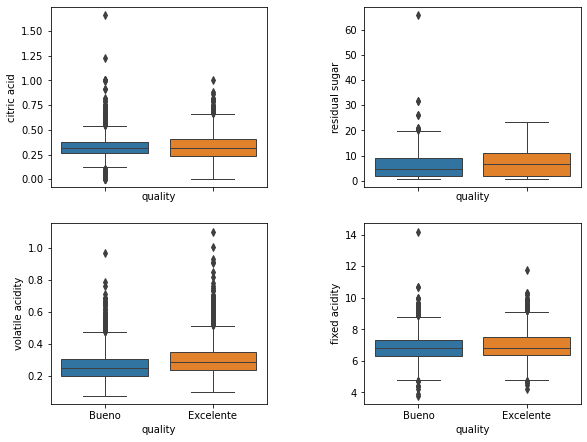

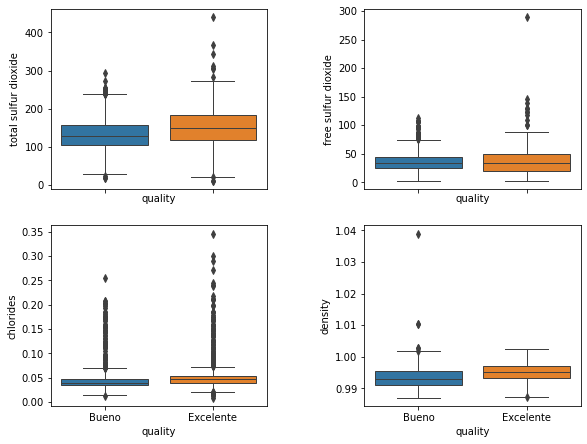

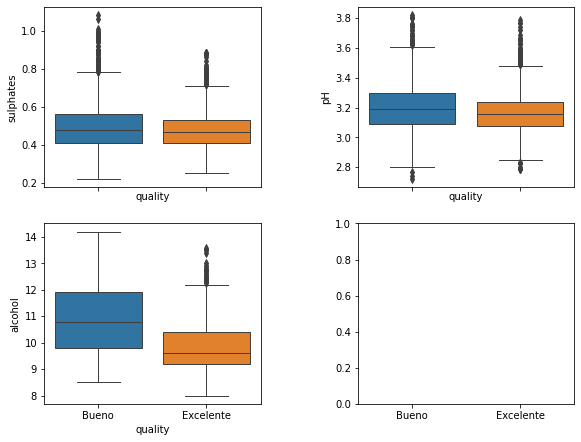

In [9]:
g, axes = plt.subplots( 2, 2, figsize=(9.5, 9.5), sharex= True)

sns.boxplot(x="quality", y="fixed acidity", data=e_data,  linewidth=1., ax=axes[1, 1])
sns.boxplot(x="quality", y="volatile acidity", data=e_data,  linewidth=1., ax=axes[1, 0])
sns.boxplot(x="quality", y="citric acid", data=e_data,  linewidth=1., ax=axes[0, 0])
sns.boxplot(x="quality", y="residual sugar", data=e_data,  linewidth=1., ax=axes[0, 1])

plt.xticks([0,1],["Bueno", "Excelente" ])
plt.subplots_adjust(wspace=0.45, bottom=0.3)

f, axes = plt.subplots( 2, 2, figsize=(9.5, 9.5), sharex= True)


sns.boxplot(x="quality", y='chlorides', data=e_data,  linewidth=1., ax=axes[1, 0])
sns.boxplot(x="quality", y='free sulfur dioxide', data=e_data,  linewidth=1., ax=axes[0, 1])
sns.boxplot(x="quality", y='total sulfur dioxide', data=e_data,  linewidth=1., ax=axes[0, 0])
sns.boxplot(x="quality", y='density', data=e_data,  linewidth=1., ax=axes[1, 1])

plt.xticks([0,1],["Bueno", "Excelente" ])
plt.subplots_adjust(wspace=0.45, bottom=0.3)

x, axes = plt.subplots( 2, 2, figsize=(9.5, 9.5), sharex= True)

sns.boxplot(x="quality", y='pH', data=e_data,  linewidth=1., ax=axes[0, 1])
sns.boxplot(x="quality", y='sulphates', data=e_data,  linewidth=1., ax=axes[0, 0])
sns.boxplot(x="quality", y='alcohol', data=e_data, linewidth=1. , ax=axes[1, 0]);

plt.xticks([0,1],["Bueno", "Excelente" ])
plt.subplots_adjust(wspace=0.45, bottom=0.3);




## Qualitative variable

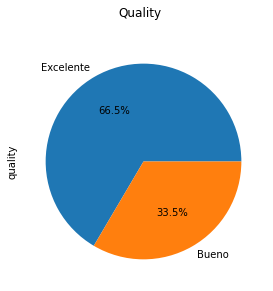

In [10]:
plot_1 = e_data['quality'].value_counts().plot(kind='pie', autopct='%1.1f%%',  
                                            figsize=(4.5,4.5),
                                            title='Quality', labels=("Excelente","Bueno"),subplots=True)                                            


## Quantitative variables

I use Pearson's correlation for a quick and simple summary of the direction and strength of the relationship between two or more numeric variables. 

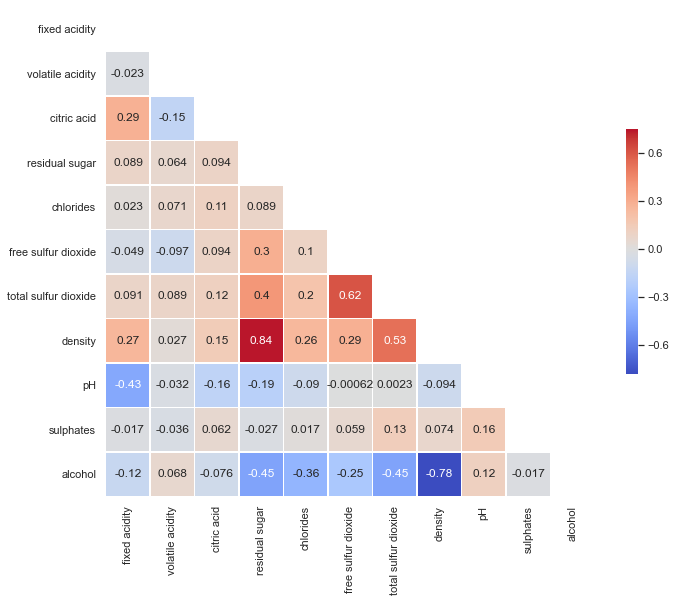

In [11]:
sns.set(style="white")
corr_pearson = e_data.corr(method='pearson', min_periods=1)

mask = np.triu(np.ones_like(corr_pearson, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
# cmap = sns.diverging_palette(220, 10, as_cmap=False)

sns.heatmap(corr_pearson, mask=mask, annot=True,cmap="coolwarm", vmax=0.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [12]:
# e_data.columns

A 0.84 correlationship between residual sugar ans density

## Logistic Regression


Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

In regression analysis, logistic regression is estimating the parameters of a of binary regression. Mathematically, a binary logistic model has a dependent variable with two possible values, such as presence of disease/not presence of disease which is represented by an indicator variable, where the two values are labeled "0" and "1". 

In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1"(presence of disease) is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1"), hence the labeling; the function that converts log-odds to probability is the logistic function, hence the name. The unit of measurement for the log-odds scale is called a logit, from logistic unit.

Analogous models with a different sigmoid function instead of the logistic function can also be used, such as the probit model; the defining characteristic of the logistic model is that increasing one of the independent variables multiplicatively scales the odds of the given outcome at a constant rate, with each independent variable having its own parameter; for a binary dependent variable this generalizes the odds ratio. 


In [13]:
data= e_data.copy()
data['quality'] = data['quality'].map({'EXCELENTE': 0, 'BUENO': 1})

In [14]:
y  = data["quality"]
x1 = data[["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]]

In [15]:
x       = sm.add_constant(x1)
results = sm.Logit(y,x).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.503532
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 4898
Model:                          Logit   Df Residuals:                     4886
Method:                           MLE   Df Model:                           11
Date:                Sun, 25 Apr 2021   Pseudo R-squ.:                  0.2102
Time:                        08:52:58   Log-Likelihood:                -2466.3
converged:                       True   LL-Null:                       -3122.7
Covariance Type:            nonrobust   LLR p-value:                7.716e-275
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -258.2369     70.986     -3.638      0.000    -397.367    -119.107
fixed acidity           -0.0365      0.072     -0.508      0.611      -0.177       0.104
volatile acidity         6.4590      0.413     15.646      0.000       5.650       7.268
citric acid             -0.1158      0.303     -0.382      0.702      -0.710       0.478
residual sugar          -0.1701      0.027     -6.291      0.000      -0.223      -0.117
chlorides               -0.8852      1.671     -0.530      0.596      -4.161       2.391
free sulfur dioxide     -0.0096      0.003     -3.451      0.001      -0.015      -0.004
total sulfur dioxide     0.0013      0.001      1.101      0.271      -0.001       0.004
density                270.8743     71.952      3.765      0.000     129.851     411.897
pH                      -1.0900      0.362     -3.013      0.003      -1.799      -0.381
sulphates               -1.7974      0.360     -5.000      0.000      -2.502      -1.093
alcohol                 -0.7429      0.094     -7.937      0.000      -0.926      -0.559
========================================================================================
"""

The coefficient table showed that volatile acidity, residual sugar,free sulfur dioxide, density, pH, sulphates and alcohol have significant influence (p-values < 0.05) on white wine quality.

The coefficients are in log-odds terms. The interpretation of the model coefficients could be as follows:
Each one-unit change in type of volatile acidity will increase the log odds of having an excelent wine quality by 6.5.

Similarly, with each unit increase in number of residual sugar decrease the log odds of having an excelent wine quality  by -0.17.

Each one-unit change in dnesity will increase the log odds of having an excellent white wine by 270.9.


#### The odds ratio

The odds ratio represents the constant effect of a predictor X, on the likelihood that one outcome will occur.



In [16]:
# odds ratios and 95% CI
params = np.round(results.params,10)
conf = results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']
np.exp(conf)

,2.5%,97.5%,Odds Ratio
const,2.665864e-173,1.872492e-52,7.065273e-113
fixed acidity,8.376448e-01,1.109821e+00,9.641761e-01
volatile acidity,2.842507e+02,1.433780e+03,6.383986e+02
citric acid,4.918628e-01,1.612712e+00,8.906363e-01
residual sugar,8.000722e-01,8.895157e-01,8.436093e-01
chlorides,1.559216e-02,1.092038e+01,4.126407e-01
free sulfur dioxide,9.850583e-01,9.958612e-01,9.904450e-01
total sulfur dioxide,9.989601e-01,1.003714e+00,1.001334e+00
density,2.475472e+56,7.670164e+178,4.357439e+117
pH,1.654534e-01,6.832800e-01,3.362306e-01


One can compute the odds ratio by taking exponent of the estimated coefficients. 

In the above ODDS ratio table, you can observe that volatile acidity has an ODDS Ratio of 6.38, which indicates that one unit increase in volatile acidity increases the odds of having an excellent white wine by 6.38 times.

Then, residual sugar has an ODDS Ratio of 8.436093e-01, which indicates that one unit increase in num_major_vessels decreases the odds of having an excellent white wine by 8.436093e-01 times.

And finally, the density variable has an ODDS Ratio of 4.357439e+117, which indicates that one unit increase in density,  increases the odds of having an excellent white wine by 4.4 times.


In [17]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [18]:
confusion_matrix(x,y,results)

(array([[2860.,  398.],
        [ 826.,  814.]]), 0.750102082482646)

This model has an accuracy of 75% 

## Support-vector machine

 Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). SVM maps training examples to points in space so as to maximise the width of the gap between the two categories. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.
 
Generally, Support Vector Machines is considered to be a classification approach, it but can be employed in both types of classification and regression problems. It can easily handle multiple continuous and categorical variables. 





In [19]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x1, y, test_size=0.3,random_state=109) # 70% training and 30% test

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC( kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [22]:
# Model Accuracy
from sklearn import metrics 
print(f"The accuracy of the model is: {(np.round(metrics.accuracy_score(y_test, y_pred),2)*100)}%")
print("\n")
# Model Precision
print(f"The Actual positives of the model is {np.round(metrics.precision_score(y_test, y_pred),2)*100}%. Precision refers about how accurate your model is out of those predicted positives ( Predicted 1).")
print("\n")

# Model Recall
print(f"If there was excellent wine quality in this database, the VSM model can identify it {np.round(metrics.recall_score(y_test, y_pred),3)*100}% of the time")

The accuracy of the model is: 75.0%


The Actual positives of the model is 71.0%. Precision refers about how accurate your model is out of those predicted positives ( Predicted 1).


If there was excellent wine quality in this database, the VSM model can identify it 44.2% of the time


[[reference support vector machine](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)]

Both models are equally acurrated with an 75%.


## Differences between logistic regression and  support vector machine


- SVM tries to finds the “best” margin (distance between the line and the support vectors) that separates the classes and this reduces the risk of error on the data, while logistic regression does not, instead it can have different decision boundaries with different weights that are near the optimal point.

- SVM works well with unstructured and semi-structured data like text and images while logistic regression works with already identified independent variables.

- SVM is based on geometrical properties of the data while logistic regression is based on statistical approaches.

- The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting.

## When To Use Logistic Regression vs Support Vector Machine

Depending on the number of training sets (data)/features that you have, you can choose to use either logistic regression or support vector machine.

Lets take these as an example where :
n = number of features,
m = number of training examples

1. If n is large (1–10,000) and m is small (10–1000) : use logistic regression or SVM with a linear kernel.

2. If n is small (1–10 00) and m is intermediate (10–10,000) : use SVM with (Gaussian, polynomial etc) kernel

3. If n is small (1–10 00), m is large (50,000–1,000,000+): first, manually add more features and then use logistic regression or SVM with a linear kernel

Generally, it is usually advisable to first try to use logistic regression to see how the model does, if it fails then you can try using SVM without a kernel (is otherwise known as SVM with a linear kernel). Logistic regression and SVM with a linear kernel have similar performance but depending on your features, one may be more efficient than the other.

# References

[Bayesian statistics](https://www.open.edu/openlearn/ocw/pluginfile.php/1061828/mod_resource/content/3/Bayesian%20statistics%20PDF.pdf)